In [83]:
# import block
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# setting the random seed for later use
SEED = torch.manual_seed(42)

In [84]:
# open the file and read all the names
try:
    with open('./data/names.txt', 'r') as f:
        names = f.read().splitlines()
except FileNotFoundError:
    print('No such file found!')

# total number of names
len(names)

32033

In [85]:
# exploring the data
br_tkn = '*'
chars = list(set(''.join(names)))
chars.append(br_tkn)

itos = {i: s for i, s in enumerate(sorted(chars))}
stoi = {v: k for k, v in itos.items()}

In [111]:
# pairing up the bigrams
BIGRAMS = torch.zeros(size=(len(chars), len(chars)), dtype=torch.int32)
for name in names:
    name = list(br_tkn) + list(name) + list(br_tkn)
    for c1, c2 in zip(name, name[1:]):
        BIGRAMS[stoi[c1], stoi[c2]] += 1

BIGRAMS.shape

torch.Size([27, 27])

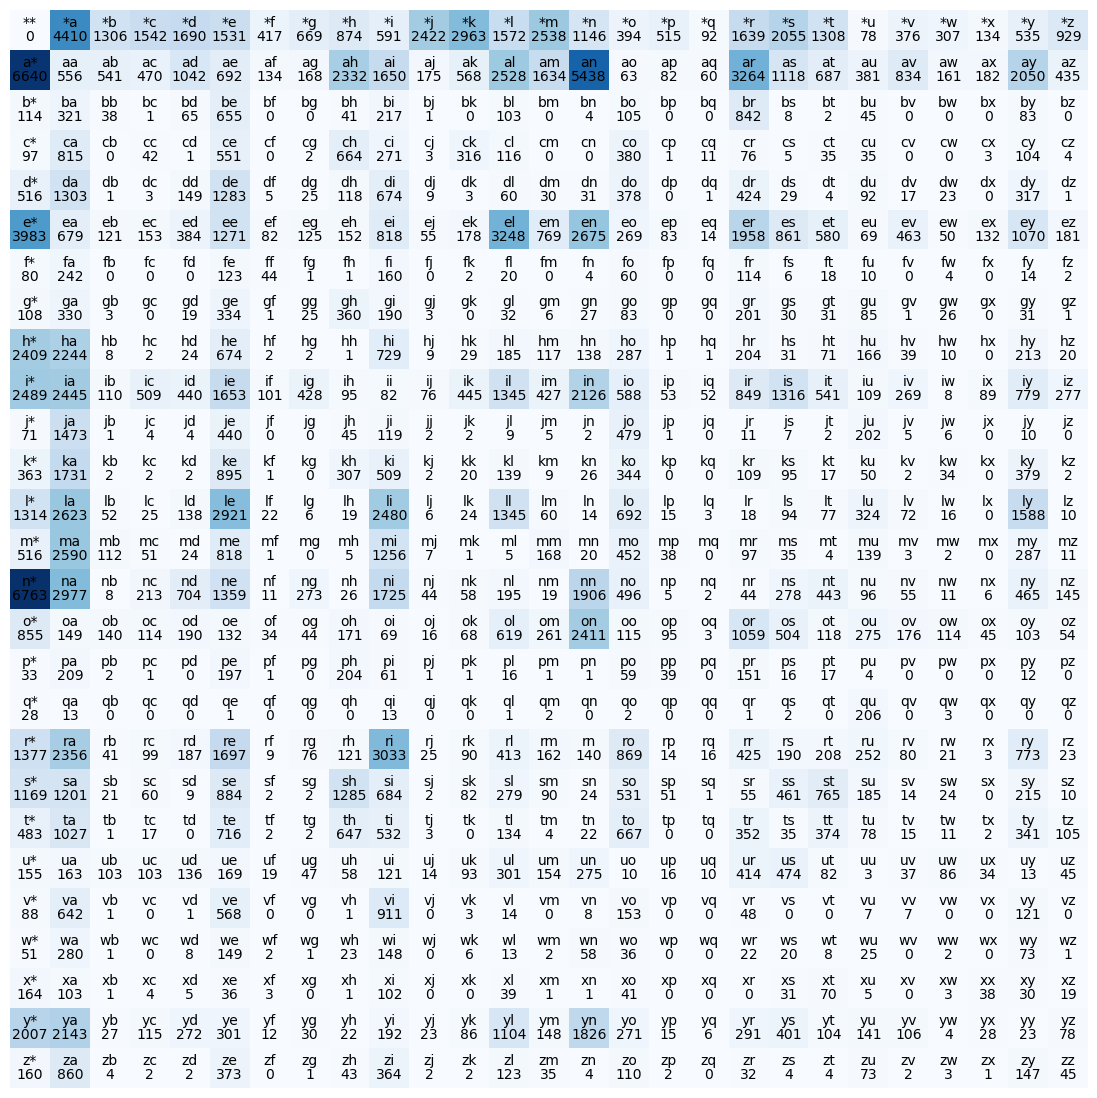

In [132]:
plt.figure(figsize=(14, 14))
plt.imshow(BIGRAMS, cmap='Blues')
for i, c1 in itos.items():
    for j, c2 in itos.items():
        bg_text = c1+c2
        plt.text(j, i, bg_text, ha='center', va='bottom', color='black')
        plt.text(j, i, BIGRAMS[i, j].item(),
                 ha='center', va='top', color='black')
plt.axis(False)